In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


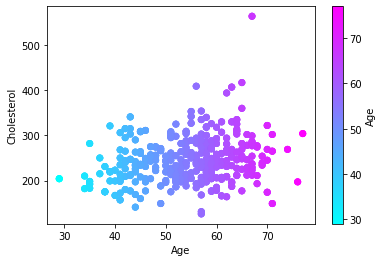

In [4]:
plt.scatter(df['age'], df['chol'], c=df['age'], cmap='cool')

# Add a colorbar to show the range of ages
cbar = plt.colorbar()
cbar.set_label('Age')

# Set the labels for the x- and y-axes
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Show the plot
plt.show()

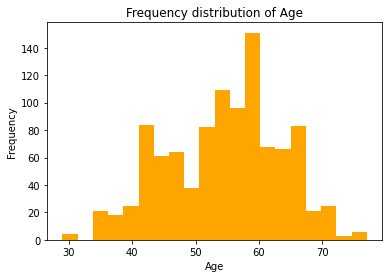

In [19]:
# Create a histogram of the 'age' column
plt.hist(df['age'], bins=20, color='orange')

# Add labels for the x- and y-axes
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a title to the plot
plt.title('Frequency distribution of Age')

# Show the plot
plt.show()

In [16]:
x = df.drop('target',axis=1)
y=df.target

In [17]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [26]:
#Create a svm Classifier and hyper parameter tuning
ml = svm.SVC()

#defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000, 10000],

'gamma': [1,0.1,0.01, 0.001,0.0001],

'kernel': ['rbf']}

grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1, cv=15) #fitting the model for grid search

grid_search=grid.fit(x_train, y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [27]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [32]:
accuracy= grid_search.best_score_*100
print('Accuracy for training dataset with tuning: {:.2f}%'.format(accuracy))

Accuracy for training dataset with tuning: 98.90%


In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [36]:
#y_test_hat = predicted value
y_test_hat= grid.predict(x_test)
test_accuracy= accuracy_score(y_test, y_test_hat)*100
test_accuracy
print('Accuracy for our testing dataset with tuning is : {:.2f}%'.format(test_accuracy))

Accuracy for our testing dataset with tuning is : 98.05%


In [37]:
confusion_matrix= metrics.confusion_matrix(y_test, y_test_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels= [True, False])

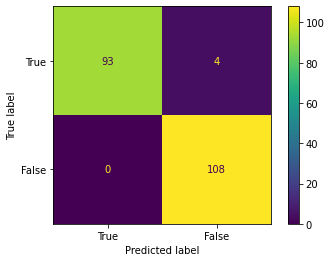

In [38]:
cm_display.plot()
plt.show()

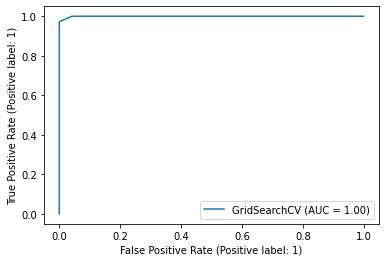

In [41]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(grid,x_test,y_test)